# 🛍️ 파이썬을 통해 내 소비패턴 분석(무신사 주문내역) 
이 프로젝트는 나의 무신사 주문내역(2020~2025) CSV 파일을 Python의 표준 csv 모듈과 데이터 분석 라이브러리 pandas를 사용해 불러오고 가공하여, 두 방법의 특징과 장단점을 비교 분석하는 것을 목표로 한다.

## 📂 1. 데이터 불러오기

In [7]:
# 기본 모듈 사용
import csv, os
os.chdir(r'C:\Users\82109\OneDrive\바탕 화면\컴공전과 준비')
f = open('musinsa_orders.csv', 'r')
mu = csv.reader(f)
mu_list = []
for i in mu:
    del i[6:8]
    mu_list.append(i) #csv형태의 파일을 불러와 가공하기좋은 리스트형으로 변환
print(mu_list[0]) #헤더 출력
    

   






['주문일자', '상품명', '카테고리', '브랜드', '구매금액', '색상']


## 🧹 2. 데이터 전처리
- 주문금액은 csv파일 내에서는 문자형으로 저장되지만, 주문금액에 대한 분석을 하기위해서는 이를 숫자형으로 변환해야한다. 이 작업을 데이터 전처리 단계에서 진행한다.

In [27]:
# 문자형 자료를 숫자형으로 바꾸기
for i in mu_list:
    for j in i:
        try:
            i[i.index(j)] = int(j.replace(',',''))
        except:
            pass
   



## 📊 3. csv모듈로 분석
csv모듈을 통해 총 주문건수 및 금액을 연도별로 분석한다.

In [9]:
# csv 모듈 이용

#총 주문건수
orders = len(mu_list) -1 #2020~2025 총 주문건수는 csv파일 전체 행 개수에서 헤더 행 하나를 뺀 개수이다.
orders

92

In [29]:
#총 주문금액
orders_price = []
for i in mu_list:
    orders_price.append(i[4]) #구매금액만을 요소로하는 리스트 제작
del(orders_price[0]) #합계 계산하기위해 첫째자리 제거
print(orders_price)
sum(orders_price)


[29500, 155000, 27216, 38634, 47200, 97720, 79380, 50430, 26540, 40460, 62100, 119210, 15610, 14220, 80520, 55663, 29211, 38171, 77430, 29438, 23890, 20448, 17977, 30921, 25555, 36304, 30921, 46905, 78705, 34440, 47524, 43575, 92650, 13500, 47740, 47400, 45082, 37006, 50967, 70150, 61471, 34100, 30225, 205161, 26628, 41705, 65912, 56430, 70623, 164450, 76303, 23715, 60790, 53634, 10272, 109049, 29250, 19184, 52772, 96492, 39200, 32775, 46084, 74472, 23989, 71725, 31321, 65016, 40131, 42745, 28606, 67620, 52268, 60669, 39000, 57318, 55273, 68335, 105774, 31027, 32928, 13066, 27222, 34900, 64884, 42457, 32508, 11067, 119000, 57738, 24704, 25955]


4763256

In [30]:
#연도별 주문건수 및 주문금액
import re #연도별로 구분하기 위해 re 호출

# 구분된 주문일자와 주문금액 삽입될 빈 리스트 생성
year_price = []
yp_2025 = []
yp_2024 = []
yp_2023 = []
yp_2022 = []
yp_2021 = []
yp_2020 = []

#전체 리스트에서 주문일자와 주문금액만 추출하여 새 리스트 만들기
for i in mu_list:
    year_price.append([i[0],i[4]])
for i in year_price:
    i[0] = str(i[0])


#정규표현식을 통해 주문일자의 앞자리를 연도별로 구분해서 리스트에 담는 과정
for i in year_price:
    if re.match('2025', i[0]):
        yp_2025.append(i)
    elif re.match('2024',i[0]):
        yp_2024.append(i)
    elif re.match('2023', i[0]):
        yp_2023.append(i)
    elif re.match('2022', i[0]):
        yp_2022.append(i)
    elif re.match('2021',i[0]):
        yp_2021.append(i)
    elif re.match('2020',i[0]):
        yp_2020.append(i)

#각 변수에 주문일자와 주문금액이 연도별로 저장됨
print(yp_2025)


#각 리스트의 요소 개수가 곧 연도별 주문건수
print(len(yp_2025),len(yp_2024),len(yp_2023),len(yp_2022),len(yp_2021),len(yp_2020), sep = '\n')

#각 리스트에서 주문금액의 합을 구하면 연도별로 주문금액을 구할 수 있음. 2025년과 2024년의 주문금액
sum_2025 = 0
sum_2024 = 0
sum_2023 = 0
sum_2022 = 0
sum_2021 = 0
sum_2020 = 0
for i in yp_2025:
    sum_2025 += i[1]
for i in yp_2024:
    sum_2024 += i[1]
for i in yp_2023:
    sum_2023 += i[1]
for i in yp_2022:
    sum_2022 += i[1]
for i in yp_2021:
    sum_2021 += i[1]
for i in yp_2020:
    sum_2020 += i[1]
    

print(sum_2025,sum_2024,sum_2023,sum_2022,sum_2021,sum_2020, sep = '\n')
    



[['20250625', 29500], ['20250625', 155000], ['20250624', 27216], ['20250624', 38634], ['20250528', 47200], ['20250528', 97720], ['20250523', 79380], ['20250523', 50430], ['20250520', 26540], ['20250520', 40460], ['20250520', 62100], ['20250519', 119210], ['20250515', 15610], ['20250515', 14220], ['20250509', 80520]]
15
3
25
36
5
8
883740
123045
1074324
2164691
139143
378313


## 🐼 4. pandas로 분석
앞서 csv모듈에서 했던 과정을 동일하게 수행한다. 이에 더하여 카테고리, 색상, 브랜드 별로 주문추이를 심층적으로 분석해본다.

## 4-1) csv 파일 불러와서 데이터프레임으로 만들기
앞서 작업했던 'musinsa_orders.csv' 파일을 판다스를 통해 불러와서 가공을 위한 형태로 변환한다.

In [3]:
import pandas as pd #판다스 호출
import re, os
os.chdir(r'C:\Users\82109\OneDrive\바탕 화면\컴공전과 준비') #csv파일이 있는 폴더로 이동
df = pd.read_csv('musinsa_orders.csv', encoding = 'cp949', thousands = ',') #read_csv()통해 df에 csv파일을 가공하기쉬운 데이터프레임 형태로 변환하여 저장
df.head() #변환 확인용 함수




,주문일자,상품명,카테고리,브랜드,구매금액,색상
0,20250625,버뮤다 팬츠,하의,피지컬 에듀케이션 디파트먼트,29500,black
1,20250625,구두,신발,킨치,155000,x
2,20250624,반팔티,상의,그레이버,27216,white
3,20250624,캡모자,모자,테켓,38634,x
4,20250528,반팔티,상의,나이스고스트클럽,47200,white


## 4-2) csv모듈로 수행했던 작업 동일하게 수행
앞서 csv모듈로 총 주문건수 및 금액을 구했던 작업과 연도별로 나누어 분석했던 작업을 판다스를 통해 동일하게 수행해본다.

In [5]:
#1 총 주문건수 및 금액 구하기

print(len(df)) #총 주문건수
print(df['구매금액'].sum()) #총 주문금액



92
4763256


In [4]:
#2 연도별 주문건수 및 주문금액 구하기
#주문건수
df['주문일자'] = df['주문일자'].astype(str) #주문일자를 연도별로 구분하여 추출하기위해 정수형보다 문자형으로 변환하는게 편리함
new = df.loc[:, ('주문일자', '구매금액')] #주문일자와 주문금액만 따로 추출한 테이블을 new 변수에 저장

con = new['주문일자'].str.contains('2025') # n년에 해당하는 값만 추출하기위한 조건식(str.contains()에 연도만 구분해서 입력해주면 각 연도별 값 추출 가능)
print(len(new[con]), new[con]['구매금액'].sum(), sep = '\n') #주문건수, 주문금액 각각 출력
new[con]






15
883740


,주문일자,구매금액
0,20250625,29500
1,20250625,155000
2,20250624,27216
3,20250624,38634
4,20250528,47200
5,20250528,97720
6,20250523,79380
7,20250523,50430
8,20250520,26540
9,20250520,40460


## 📈 5. 추가 분석
상품, 카테고리, 색상, 브랜드 등을 토대로 내 소비패턴을 세부적으로 분석해본다.

In [30]:
#상품명 입력하면 동일 상품 구매이력 모아주는 프로그램 개발
def search_products():
    pd = input('찾고자 하는 품목을 입력하세요: ')
    con = (df['상품명'] == pd) #입력받은 상품명을 도메인값으로 가지는 열 찾는 조건
    print('총 주문건수:',len(df[con]), '총 주문금액:',df[con]['구매금액'].sum())
    return df[con]
search_products()



찾고자 하는 품목을 입력하세요:  니트


총 주문건수: 8 총 주문금액: 339934


,주문일자,상품명,카테고리,브랜드,구매금액,색상
20,20230714,니트,상의,데이,23890,navy
25,20230509,니트,상의,니티드,36304,navy
34,20230222,니트,상의,엘무드,47740,oragne
45,20221214,니트,상의,드로우핏,41705,ivory
47,20221122,니트,상의,드로우핏,56430,navy
62,20220806,니트,상의,미나브,46084,blue
76,20220206,니트,상의,엘무드,55273,brown
86,20201218,니트,상의,테이크이지,32508,brown


In [36]:
#최다 구매 브랜드 top3
counts_brand = df['브랜드'].value_counts() #value_counts()통해 각 도메인값의 빈도수 추출
counts_brand #각 브랜드별 빈도수를 알 수 있다.
print('<최다 구매 브랜드 top3>', 'Top1: 무신사 스탠다드', 'Top2: 드로우핏', 'Top3: 아웃스탠딩', sep = '\n')


<최다 구매 브랜드 top3>
Top1: 무신사 스탠다드
Top2: 드로우핏
Top3: 아웃스탠딩


In [38]:
#최다 구매 색상 top5
counts_color = df['색상'].value_counts()
print(counts_color)
print('<최다 구매 색상 top5>', 'black', 'white', 'ivory', 'blue', 'beige', sep = '\n')

색상
x           23
black       19
white       10
ivory        9
blue         6
beige        5
navy         5
brown        4
charcoal     3
grey         2
indigo       2
pink         1
oragne       1
gray         1
green        1
Name: count, dtype: int64
<최다 구매 색상 top5>
black
white
ivory
blue
beige


## 📈 6. 데이터 시각화
소비패턴을 한눈에 파악하기위해 맷플롯립을 통해서 시각화해본다.

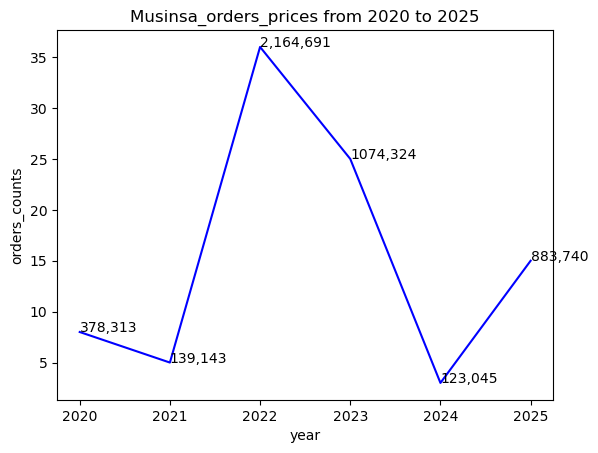

In [40]:
#연도에 따른 주문건수 및 금액을 한눈에 보기쉽게 그래프를 통해 시각화
from matplotlib import pyplot as plt #맷플롯립 호출
%matplotlib inline
#x,y축 각각 연도와 주문건수로 설정하고 z에 구매금액을 리스트로 저장하여 텍스르로 추가한다
x = [2020, 2021, 2022, 2023, 2024, 2025]
y = [8, 5, 36, 25, 3, 15]
z = ['378,313', '139,143', '2,164,691', '1074,324', '123,045', '883,740']

plt.xlabel('year')
plt.ylabel('orders_counts')
plt.title('Musinsa_orders_prices from 2020 to 2025')
plt.plot(x,y,'b')
for i in range(len(x)):
    plt.text(x[i], y[i], z[i], fontsize = 10) #구매금액을 각 그래프 점 주위에 텍스트로 표시
plt.show()




## ✅ 7. 소비패턴 분석 및 결과 요약
여러 수단으로 분석해본 소비패턴을 요약해서 정리해본다.

✅ 무신사 소비 패턴 요약 (2020~2025)

총 주문 건수: 92건

총 주문 금액: 4,763,256원

📌 1. 연도별 소비 패턴
가장 많이 소비한 해: 2022년

대학 입학으로 의류 구매 증가

가장 적게 소비한 해: 2024년

군복무로 의류 구매 감소

📌 2. 가장 많이 구매한 상품군

반팔티

데님팬츠

니트

📌 3. 선호 브랜드 순위
1️⃣ 무신사 스탠다드
2️⃣ 드로우핏
3️⃣ 아웃스탠딩

📌 4. 선호 색상 순위
1️⃣ 블랙
2️⃣ 화이트
3️⃣ 아이보리
4️⃣ 블루




## 📊 8. CSV 모듈 vs Pandas 모듈 비교 분석
두 수단으로 작업을 해본 결과, 내가 느낀 각 수단의 특징과, 장단점을 정리해본다.


### 1️⃣ 데이터 처리 방식

* **CSV 모듈**: Python 표준 라이브러리로, 파일 입출력과 간단한 데이터 파싱에 적합하다. 행 단위로 데이터를 처리하며, 모든 데이터를 직접 순회하면서 가공해야 한다.
* **Pandas**: DataFrame이라는 강력한 데이터 구조를 제공하여 대용량 데이터도 효율적으로 처리할 수 있다. 열 단위 연산, 필터링, 그룹화 등 고급 데이터 분석 기능을 간단한 코드로 실행할 수 있다.

### 2️⃣ 코드의 가독성과 효율성

* **CSV 모듈**: 간단한 데이터 읽기에는 충분하지만, 데이터 필터링, 집계 등을 하려면 반복문과 조건문을 직접 작성해야 하므로 코드가 길어지고 복잡해진다.
* **Pandas**: 고급 메서드와 속성들이 잘 정리되어 있어 한두 줄의 코드로도 복잡한 연산을 수행할 수 있다. 가독성이 높고 유지보수가 쉽다.

### 3️⃣ 데이터 타입과 변환

* **CSV 모듈**: 읽어온 데이터는 문자열(str)로 처리되기 때문에, 숫자 연산이나 날짜 처리 등을 위해 매번 직접 형변환이 필요하다.
* **Pandas**: 열 단위로 데이터 타입을 자동으로 추론하거나 쉽게 변환할 수 있다. 수치 연산, 날짜/시간 처리에 유리하다.

### 4️⃣ 데이터 출력과 시각화

* **CSV 모듈**: 표 형태 출력이 따로 지원되지 않아, print문으로 출력하거나 별도로 포맷을 만들어야 한다.
* **Pandas**: DataFrame은 테이블 형태로 출력되어 데이터 상태를 한눈에 확인할 수 있다. 시각화 라이브러리(Matplotlib)와 연계하여 그래프 분석도 쉽게 확장 가능하다.

### ✅ 정리

* **CSV 모듈**은 파이썬 기본 기능만으로 가벼운 CSV 파일 입출력이나 단순 작업에 적합하다.
* **Pandas**는 데이터 분석과 처리에 특화되어 있어, 큰 규모의 데이터셋을 빠르고 직관적으로 다룰 수 있다.

따라서 간단한 파일 입출력에는 CSV 모듈이 적합하고, 데이터 가공·분석·시각화까지 고려한다면 Pandas가 훨씬 강력하고 생산적이다.






| 항목             | CSV 모듈                       | Pandas                                |
| -------------- | ---------------------------- | ------------------------------------- |
| **데이터 처리 방식**  | 파일 입출력과 간단한 파싱에 적합, 행 단위 처리  | DataFrame 제공, 열 단위 연산, 그룹화 등 고급 기능 지원 |
| **코드 가독성·효율성** | 반복문과 조건문 직접 작성, 코드 길어짐       | 간결한 메서드 사용, 짧고 가독성 높은 코드              |
| **데이터 타입과 변환** | 모든 데이터가 문자열로 처리됨, 형변환 수작업 필요 | 자동 타입 추론, 열 단위 타입 관리 가능               |
| **데이터 출력·시각화** | 표 형태 출력 미지원, 출력 포맷 수동 제작     | 테이블 형태 출력, 시각화 라이브러리와 연계 용이           |
| **종합 평가**      | 단순 입출력과 가벼운 파싱에 적합           | 데이터 가공·분석·시각화에 특화, 생산성 높음             |




